In [12]:
import pandas as pd 

In [13]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [14]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [16]:
col_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [17]:
diabetes[col_norm].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [18]:
diabetes[col_norm]= diabetes[col_norm].apply(lambda x: x-x.min() / x.max() - x.min() )

In [19]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [20]:
import tensorflow as tf

In [21]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [22]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep= tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi= tf.feature_column.numeric_column('BMI')
diabetes_pedigree= tf.feature_column.numeric_column('Pedigree')
age= tf.feature_column.numeric_column('Age')

In [26]:
assigned_gourp = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [25]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [27]:
import matplotlib.pylab as plt 
%matplotlib inline

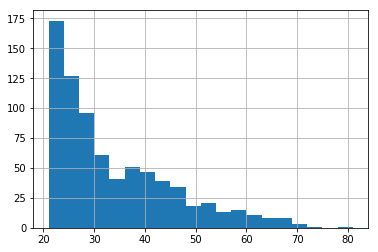

In [33]:
diabetes['Age'].hist(bins=20)

In [34]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [36]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

In [37]:
#train test split

In [38]:
x_data = diabetes.drop('Class', axis=1)

In [40]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [41]:
labels = diabetes['Class']

In [43]:
#labels

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [46]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [47]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\wael\\AppData\\Local\\Temp\\tmpl3ac2ond', '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [48]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wael\AppData\Local\Temp\tmpl3ac2ond\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 428.045
INFO:tensorflow:loss = 7.2301, step = 101 (0.236 sec)
INFO:tensorflow:global_step/sec: 498.67
INFO:tensorflow:loss = 5.54123, step = 201 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.532
INFO:tensorflow:loss = 6.4999, step = 301 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.668
INFO:tensorflow:loss = 5.52396, step = 401 (0.201 sec)
INFO:tensorflow:global_step/sec: 533.302
INFO:tensorflow:loss = 5.59306, step = 501 (0.186 sec)
INFO:tensorflow:global_step/sec: 504.98
INFO:tensorflow:loss = 3.41218, step = 601 (0.201 sec)
INFO:tensorflow:global_step/sec: 531.917
INFO:tensorflow:loss = 6.25815, step = 701 (0.185 sec)
INFO:tensorflow:global_step/sec: 544.994
INFO:tensorflow:loss = 6.94806, step = 801 (0.185 sec)
INFO:tensorflow:global_step/sec: 510.149
INFO:te

In [49]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [51]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-05-13:54:28
INFO:tensorflow:Restoring parameters from C:\Users\wael\AppData\Local\Temp\tmpl3ac2ond\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-05-13:54:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.796049, auc_precision_recall = 0.643403, average_loss = 0.530515, global_step = 1000, label/mean = 0.350649, loss = 5.10621, prediction/mean = 0.393015


In [52]:
results

{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7960493,
 'auc_precision_recall': 0.64340329,
 'average_loss': 0.53051537,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1062107,
 'prediction/mean': 0.39301479}

In [53]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [59]:
prediction = model.predict(pred_input_func)

In [60]:
my_pred = list(prediction)

INFO:tensorflow:Restoring parameters from C:\Users\wael\AppData\Local\Temp\tmpl3ac2ond\model.ckpt-1000


In [61]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52759498], dtype=float32),
  'logits': array([ 0.11049211], dtype=float32),
  'probabilities': array([ 0.47240505,  0.52759498], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.66718757], dtype=float32),
  'logits': array([ 0.69549203], dtype=float32),
  'probabilities': array([ 0.33281249,  0.66718757], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.42549822], dtype=float32),
  'logits': array([-0.30024242], dtype=float32),
  'probabilities': array([ 0.57450181,  0.42549822], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33008903], dtype=float32),
  'logits': array([-0.70778239], dtype=float32),
  'probabilities': array([ 0.66991097,  0.33008903], dtype=flo

In [62]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\wael\\AppData\\Local\\Temp\\tmpd0y_a5ee', '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [63]:
embedded_group_col = tf.feature_column.embedding_column(assigned_gourp, dimension=5)

In [69]:
feat_cols =[num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [70]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [71]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\wael\\AppData\\Local\\Temp\\tmp67wzfx38', '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [72]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wael\AppData\Local\Temp\tmp67wzfx38\model.ckpt.
INFO:tensorflow:loss = 15.7775, step = 1
INFO:tensorflow:global_step/sec: 457.517
INFO:tensorflow:loss = 3.27657, step = 101 (0.223 sec)
INFO:tensorflow:global_step/sec: 493.738
INFO:tensorflow:loss = 9.42147, step = 201 (0.201 sec)
INFO:tensorflow:global_step/sec: 482.973
INFO:tensorflow:loss = 8.31614, step = 301 (0.209 sec)
INFO:tensorflow:global_step/sec: 503.67
INFO:tensorflow:loss = 4.02532, step = 401 (0.196 sec)
INFO:tensorflow:global_step/sec: 519.415
INFO:tensorflow:loss = 4.25248, step = 501 (0.194 sec)
INFO:tensorflow:global_step/sec: 452.178
INFO:tensorflow:loss = 3.88919, step = 601 (0.220 sec)
INFO:tensorflow:global_step/sec: 436.452
INFO:tensorflow:loss = 3.56647, step = 701 (0.229 sec)
INFO:tensorflow:global_step/sec: 543.506
INFO:tensorflow:loss = 3.78027, step = 801 (0.184 sec)
INFO:tensorflow:global_step/sec: 468.11
INFO:

In [73]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1000, shuffle=True)

In [74]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-05-14:10:16
INFO:tensorflow:Restoring parameters from C:\Users\wael\AppData\Local\Temp\tmp67wzfx38\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-05-14:10:57
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.819918, auc_precision_recall = 0.703533, average_loss = 0.490783, global_step = 1000, label/mean = 0.350649, loss = 4.90783, prediction/mean = 0.327904


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8199178,
 'auc_precision_recall': 0.70353341,
 'average_loss': 0.49078345,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.9078345,
 'prediction/mean': 0.32790375}